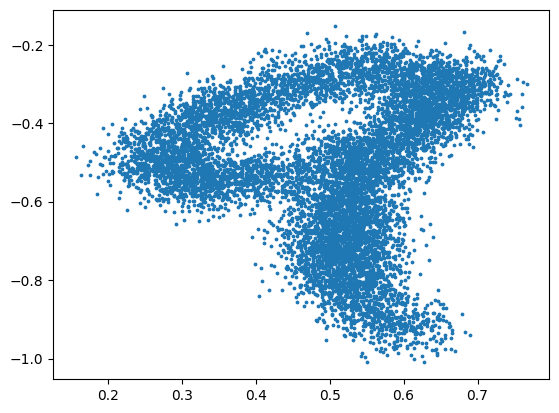

(4, 5000, 2)


In [23]:
# read the .npy file


import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from utils.datasets import  get_dataset


points = get_dataset("mnist" , n = 10000 , digit = 9)
plt.scatter(points[:,0], points[:,1], s = 3)
plt.show()
file = 'framesconbined.npy'


frames = np.load(file)  


print(frames.shape)

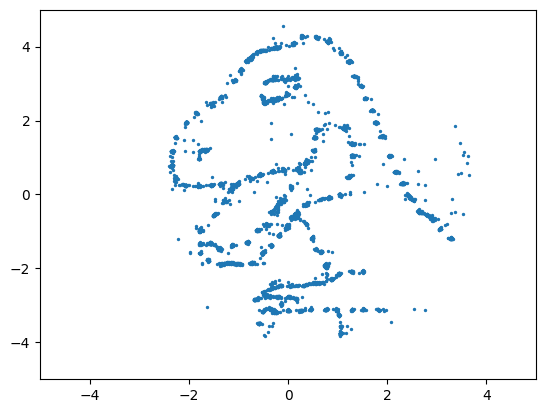

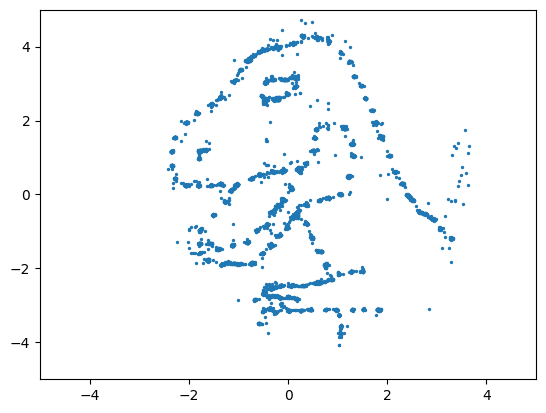

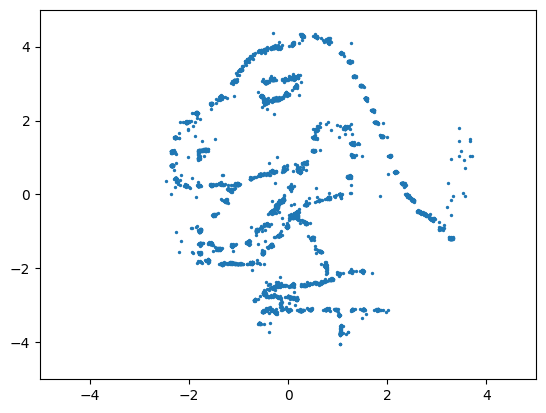

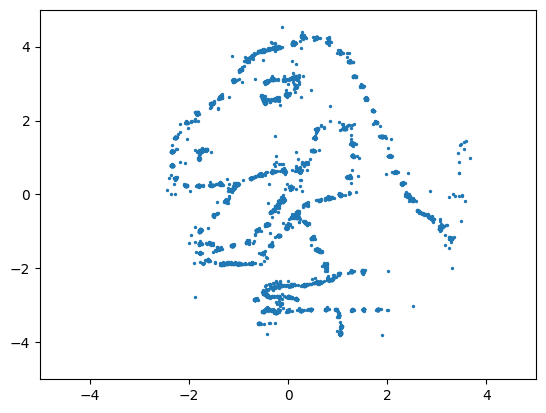

In [24]:
import matplotlib.pyplot as plt
for i in range(frames.shape[0]):
    frame = frames[i]
    plt.scatter(frame[:,0], frame[:,1], s=2)
    plt.xlim(-5 , 5)
    plt.ylim(-5 , 5)
    plt.show()

In [17]:
def coordinates_to_image(coordinates, image_size=(28, 28)):
    """
    Converts a set of x,y coordinates to a 28x28 grid image where the intensity
    of each pixel is the number of points in that grid square.

    Parameters:
    - coordinates: A numpy array or a torch tensor of shape (n, 2) where n is the number of points,
      and each row represents the x and y coordinates of a point.
    - image_size: A tuple specifying the size of the output image (height, width).

    Returns:
    - A 2D numpy array or torch tensor representing the image.
    """
    # Initialize the image to zeros
    image = np.zeros(image_size, dtype=np.float32)
    
    # Normalize coordinates to [0, image_size - 1]
    coordinates_min = coordinates.min(axis=0)
    coordinates_max = coordinates.max(axis=0)
    normalized_coordinates = (coordinates - coordinates_min) / (coordinates_max - coordinates_min) * (np.array(image_size) - 1)
    
    # Discretize the coordinates
    discretized_coordinates = np.floor(normalized_coordinates).astype(int)
    
    # Increment the pixel value for each point in its corresponding grid square
    for x, y in discretized_coordinates:
        image[y, x] += 1  # Note: y corresponds to rows (height) and x to columns (width)
    
    return image

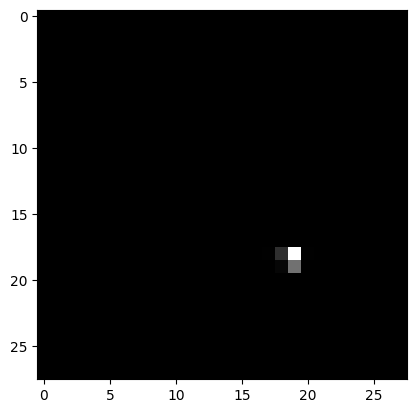

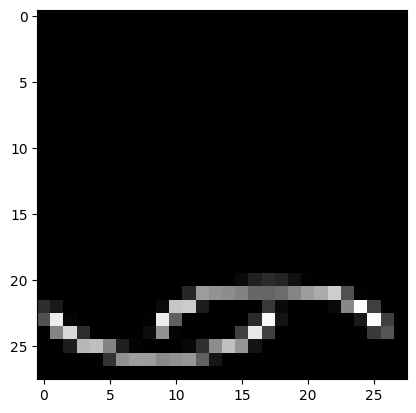

In [18]:
for i in range(frames.shape[0]): 
    plotingFrames = frames[i]
    image_gen = coordinates_to_image(plotingFrames, image_size=(28, 28))
    plt.imshow(image_gen, cmap='gray')
    plt.show()

In [55]:
print(torch.randn(3, 3))  

tensor([[ 0.4924, -0.5459,  1.2712],
        [-1.7229, -0.8941, -0.4594],
        [-0.4971,  2.2036,  1.1951]])


In [12]:
from layers.seq2seq import Seq2Seq , Encoder, Decoder





In [38]:

encoder = Encoder(300 , 100 , 2 , "cuda")
decoder = Decoder(100 , 3 , 2 , "cuda")

input_data = torch.randn((10 , 259 , 300)).to("cuda")
output = encoder(input_data)

print(input_data.shape)

torch.Size([10, 259, 300])


In [39]:
print(output)

(tensor([[[-0.1122,  0.1746, -0.2618,  ..., -0.3226, -0.4524, -0.0962],
         [-0.3508,  0.0858, -0.0269,  ...,  0.0224,  0.0289, -0.0204],
         [-0.1540, -0.2928,  0.0618,  ...,  0.2065, -0.0938,  0.1769],
         ...,
         [-0.1364, -0.4252,  0.0228,  ...,  0.2371, -0.1260, -0.1520],
         [-0.1501,  0.1013, -0.0616,  ...,  0.1196,  0.1658, -0.0862],
         [-0.0976,  0.1758,  0.0412,  ..., -0.0040,  0.1601, -0.3216]],

        [[ 0.0627,  0.0362, -0.0870,  ..., -0.0395, -0.0038, -0.1093],
         [-0.0402,  0.0433, -0.1081,  ..., -0.0659, -0.0720, -0.0973],
         [ 0.0414,  0.0669, -0.1415,  ..., -0.0222,  0.0080, -0.0582],
         ...,
         [-0.0801,  0.0200, -0.0145,  ..., -0.1437, -0.0136, -0.1365],
         [ 0.0402,  0.1064, -0.0578,  ..., -0.0105, -0.0413, -0.1269],
         [-0.0353,  0.0605, -0.1129,  ..., -0.1658, -0.0154, -0.1159]]],
       device='cuda:0', grad_fn=<CudnnRnnBackward0>), tensor([[[-0.3644,  0.6443, -0.8203,  ..., -0.5641, -0.7383, 

In [40]:
output , (hidden , cell) = encoder(input_data)


In [41]:
print(output)
print(output.shape)

tensor([[[-0.1122,  0.1746, -0.2618,  ..., -0.3226, -0.4524, -0.0962],
         [-0.3508,  0.0858, -0.0269,  ...,  0.0224,  0.0289, -0.0204],
         [-0.1540, -0.2928,  0.0618,  ...,  0.2065, -0.0938,  0.1769],
         ...,
         [-0.1364, -0.4252,  0.0228,  ...,  0.2371, -0.1260, -0.1520],
         [-0.1501,  0.1013, -0.0616,  ...,  0.1196,  0.1658, -0.0862],
         [-0.0976,  0.1758,  0.0412,  ..., -0.0040,  0.1601, -0.3216]],

        [[ 0.0627,  0.0362, -0.0870,  ..., -0.0395, -0.0038, -0.1093],
         [-0.0402,  0.0433, -0.1081,  ..., -0.0659, -0.0720, -0.0973],
         [ 0.0414,  0.0669, -0.1415,  ..., -0.0222,  0.0080, -0.0582],
         ...,
         [-0.0801,  0.0200, -0.0145,  ..., -0.1437, -0.0136, -0.1365],
         [ 0.0402,  0.1064, -0.0578,  ..., -0.0105, -0.0413, -0.1269],
         [-0.0353,  0.0605, -0.1129,  ..., -0.1658, -0.0154, -0.1159]]],
       device='cuda:0', grad_fn=<CudnnRnnBackward0>)
torch.Size([2, 10, 100])


In [42]:
print(hidden)
print(hidden.shape)

tensor([[-0.3644,  0.6443, -0.8203, -0.1979,  0.3321, -0.0794, -0.4810, -0.5085,
          0.2541,  0.1060, -0.2395, -0.3511,  0.0143, -0.4969,  0.5264, -0.1997,
         -0.2315,  0.2549, -0.0094,  0.5008,  0.2563,  0.1022, -0.4643, -0.0045,
         -0.1032,  0.3961, -0.1625,  0.1579,  0.1741,  0.0361, -0.3399, -0.9898,
         -0.0623, -0.5558,  0.0655, -0.1683,  0.8479,  0.3428,  0.1199,  0.6548,
         -0.0260, -0.0934,  1.2266, -0.4007, -0.3386,  0.1259, -0.0273,  0.6581,
          0.0587, -0.3581,  0.0859,  0.1635, -0.0177,  0.1927,  0.7226, -0.4211,
          0.2220, -0.1673, -0.0706, -0.5729,  0.1721, -0.3798, -0.2224, -0.4116,
          0.3751,  0.0214, -0.1944, -0.5351,  0.2591,  0.0048, -0.2341,  0.0894,
         -0.1014, -0.3164,  0.1730,  0.0417, -0.0691,  0.4433, -0.2277,  0.3729,
          0.1199, -0.1929, -0.4855,  0.2999,  0.1942,  0.2679,  0.2127,  0.5740,
         -0.6913, -0.0947,  0.6569,  0.0051, -0.0466,  0.0621,  0.1594,  0.1299,
         -0.5290, -0.5641, -

In [43]:
print(cell)
print(cell.shape)

tensor([[ 1.1261e-01,  7.0902e-02, -1.7262e-01, -1.0607e-01,  5.9230e-02,
         -1.1956e-01,  1.1419e-02, -4.7069e-02,  7.5786e-02,  6.5698e-02,
          1.0911e-01,  3.1415e-04,  1.5656e-03,  1.9554e-01, -1.7451e-02,
          1.3322e-01, -1.5692e-01,  1.8849e-03,  1.0558e-01,  1.9301e-01,
          1.2391e-01, -9.9736e-02, -4.9292e-02, -2.0362e-01,  1.4858e-01,
         -9.8186e-02,  1.3794e-01, -5.4281e-02,  1.6757e-02, -2.6510e-02,
         -1.1396e-01, -6.9809e-03,  4.3824e-02,  1.1623e-01,  1.7527e-01,
         -5.1057e-02, -1.0454e-01,  9.3489e-02, -5.0673e-02, -1.1568e-01,
          1.9031e-01,  1.6587e-01, -6.7685e-03,  3.3699e-02, -1.0482e-02,
         -2.2000e-02, -3.0254e-02, -9.8622e-02,  3.8200e-02,  2.8508e-02,
         -3.9916e-03,  5.4085e-02,  1.8438e-01,  7.8147e-02, -2.1999e-01,
          1.7872e-02, -6.9481e-02, -1.8805e-01,  1.7185e-01,  1.6181e-01,
          9.6337e-02, -1.2887e-01, -1.0982e-01, -6.1842e-02, -7.0397e-02,
         -2.1570e-02,  1.2188e-01, -7.

In [44]:
decoder_output = decoder( hidden , cell ,  259 , 10)


RuntimeError: For batched 3-D input, hx and cx should also be 3-D but got (2-D, 2-D) tensors

In [49]:
batch_size = 10
device = "cuda"
decoder_input = torch.empty(batch_size, 1, dtype=torch.long, device=device).fill_(0)

In [50]:
print(decoder_input)
print(decoder_input.shape)

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], device='cuda:0')
torch.Size([10, 1])
